In [209]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [2]:
df = pd.read_csv('accidents_2005_to_2007.csv',low_memory = False)

In [3]:
df1 = pd.read_csv('accidents_2009_to_2011.csv',low_memory = False)

In [4]:
df2 = pd.read_csv('accidents_2012_to_2014.csv',low_memory = False)

In [5]:
united = pd.concat([df, df1, df2])

In [8]:
united.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005


In [9]:
united.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1504150 entries, 0 to 464696
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1504150 non-null  object 
 1   Location_Easting_OSGR                        1504049 non-null  float64
 2   Location_Northing_OSGR                       1504049 non-null  float64
 3   Longitude                                    1504049 non-null  float64
 4   Latitude                                     1504049 non-null  float64
 5   Police_Force                                 1504150 non-null  int64  
 6   Accident_Severity                            1504150 non-null  int64  
 7   Number_of_Vehicles                           1504150 non-null  int64  
 8   Number_of_Casualties                         1504150 non-null  int64  
 9   Date                                         15

In [10]:
united.isnull().sum()

Accident_Index                                       0
Location_Easting_OSGR                              101
Location_Northing_OSGR                             101
Longitude                                          101
Latitude                                           101
Police_Force                                         0
Accident_Severity                                    0
Number_of_Vehicles                                   0
Number_of_Casualties                                 0
Date                                                 0
Day_of_Week                                          0
Time                                               117
Local_Authority_(District)                           0
Local_Authority_(Highway)                            0
1st_Road_Class                                       0
1st_Road_Number                                      0
Road_Type                                            0
Speed_limit                                          0
Junction_D

In [11]:
united = united.loc[:,["Accident_Severity","Number_of_Vehicles","Number_of_Casualties","Road_Type","Speed_limit","Light_Conditions","Weather_Conditions","Road_Surface_Conditions","Urban_or_Rural_Area","Year"]]

In [12]:
united

,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Year
0,2,1,1,Single carriageway,30,Daylight: Street light present,Raining without high winds,Wet/Damp,1,2005
1,3,1,1,Dual carriageway,30,Darkness: Street lights present and lit,Fine without high winds,Dry,1,2005
2,3,2,1,Single carriageway,30,Darkness: Street lights present and lit,Fine without high winds,Dry,1,2005
3,3,1,1,Single carriageway,30,Daylight: Street light present,Fine without high winds,Dry,1,2005
4,3,1,1,Single carriageway,30,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,1,2005
...,...,...,...,...,...,...,...,...,...,...
464692,2,2,1,Dual carriageway,70,Darkeness: No street lighting,Snowing without high winds,Snow,2,2014
464693,3,2,2,Dual carriageway,70,Darkeness: No street lighting,Fine without high winds,Snow,2,2014
464694,3,1,1,Single carriageway,40,Darkness: Street lights present and lit,Fine without high winds,Frost/Ice,2,2014
464695,2,3,2,Single carriageway,60,Darkeness: No street lighting,Raining without high winds,Wet/Damp,2,2014


In [13]:
year = united["Year"].value_counts()

In [14]:
year

2005    198735
2006    189161
2007    182115
2012    179715
2009    163554
2010    154414
2011    151474
2014    146322
2013    138660
Name: Year, dtype: int64

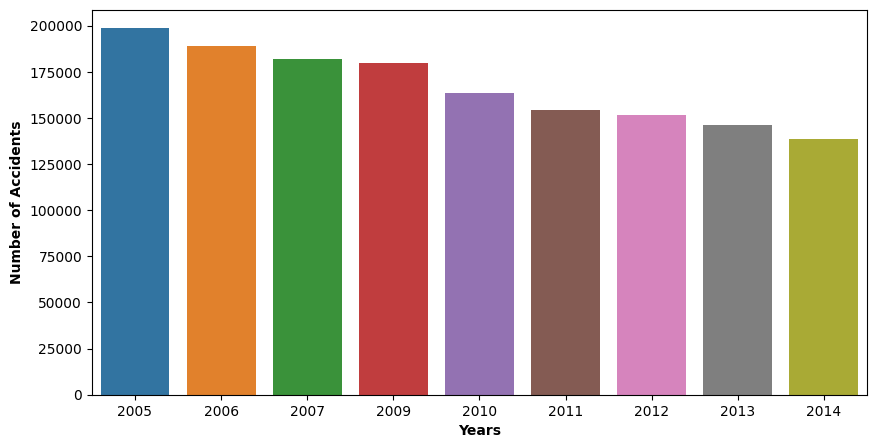

In [15]:
by_year= united["Year"].value_counts()
years = united["Year"].unique()
num_year = year.values
plt.figure(figsize = (10,5),facecolor = 'white' )
plt.subplot(1,1,1)
sns.barplot (x = years, y=num_year)
plt.ylabel("Number of Accidents",weight = "bold")
plt.xlabel("Years",weight = "bold")
plt.show()

In [16]:
## How does the change in traffic flow affect accidents?

In [17]:
united["Road_Type"].unique()

array(['Single carriageway', 'Dual carriageway', 'One way street',
       'Roundabout', 'Slip road', 'Unknown'], dtype=object)

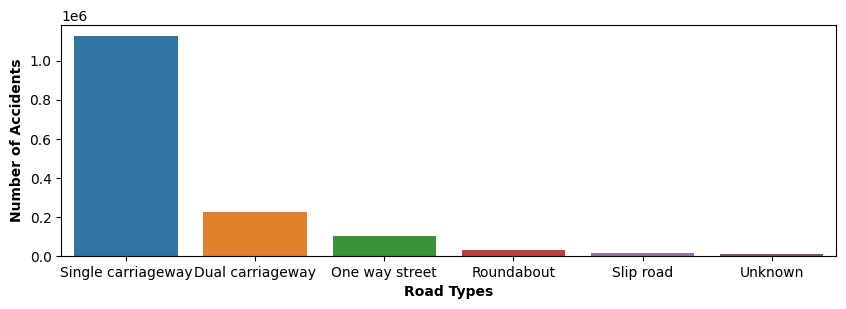

In [30]:
Road_Type = united["Road_Type"].value_counts()
Road_Types = united["Road_Type"].unique()
num_Road = Road_Type.values
plt.figure(figsize = (10,3),facecolor = 'white' )
plt.subplot(1,1,1)
sns.barplot (x = Road_Types, y= num_Road)
plt.ylabel("Number of Accidents",weight = "bold")
plt.xlabel("Road Types",weight = "bold")
plt.show()

In [19]:
## What increases accident rates?

In [20]:
united["Speed_limit"].unique()

array([30, 40, 50, 20, 60, 70, 10, 15], dtype=int64)

In [89]:
Speed_limit = united["Speed_limit"].value_counts()
limits = united["Speed_limit"].unique()
num_speed = Speed_limit.values


In [90]:
Light_Conditions = united["Light_Conditions"].value_counts()
Lights = united["Light_Conditions"].unique()
num_light = Light_Conditions.values

In [91]:
Weather_Conditions = united["Weather_Conditions"].value_counts()
Weathers = united["Weather_Conditions"].unique()
num_Weather = Weather_Conditions.values

In [92]:
Road_Surface_Conditions = united["Road_Surface_Conditions"].value_counts()
Surface = united["Road_Surface_Conditions"].unique()
num_Surface = Road_Surface_Conditions.values

Text(0.5, 1.0, 'Accident rates according to speed limits ')

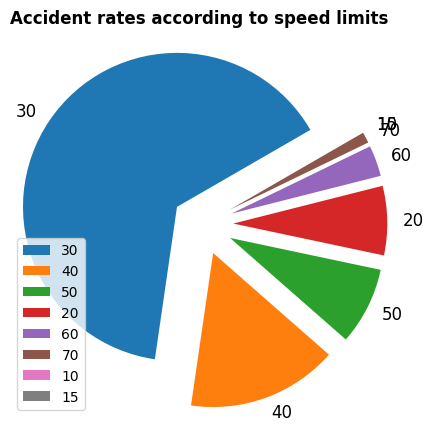

In [125]:
fig = plt.figure(figsize =(10, 5))
plt.pie(num_speed, labels = limits, colors = sns.color_palette(),startangle = 30,textprops={'size': 'large'},explode=(0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2))
plt.legend()
plt.title("Accident rates according to speed limits ",weight="bold")



Text(0.5, 1.0, 'Accident rates according to light conditions ')

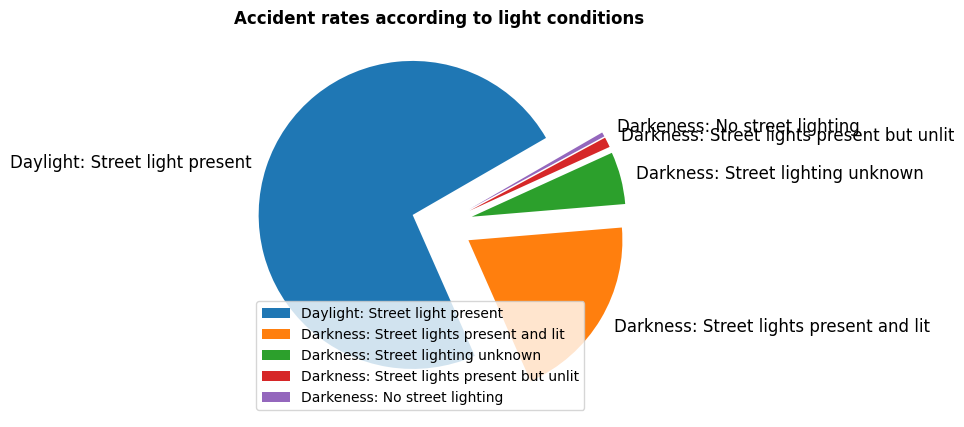

In [124]:
fig = plt.figure(figsize =(10, 5))
plt.pie(num_light, labels = Lights, colors = sns.color_palette(),startangle = 30,textprops={'size': 'large'},explode=(0.2,0.2,0.2,0.2,0.2))
plt.legend()
plt.title("Accident rates according to light conditions ",weight="bold")



Text(0.5, 1.0, 'Accident rates according to weather conditions ')

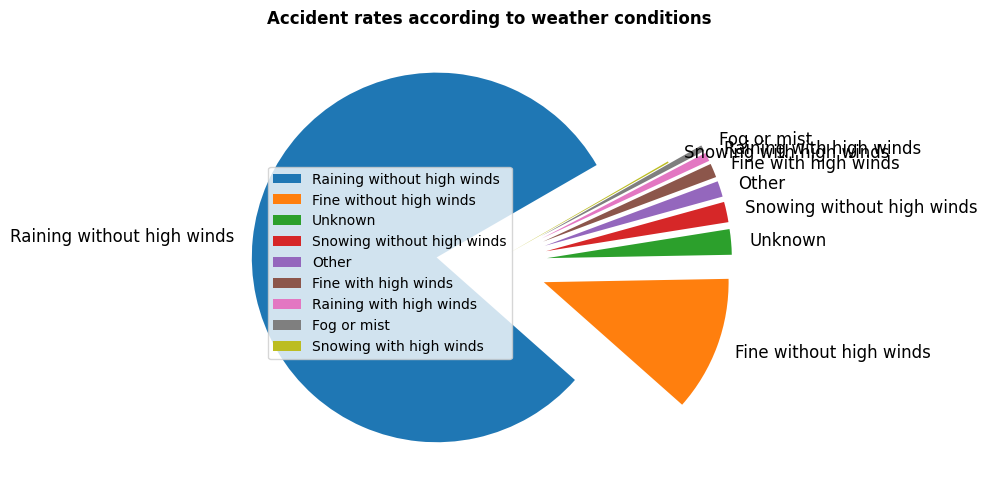

In [100]:
fig = plt.figure(figsize =(13, 6))
plt.pie(num_Weather, labels = Weathers, colors = sns.color_palette(),startangle = 30,textprops={'size': 'large'},explode=(0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.1))
plt.legend()
plt.title("Accident rates according to weather conditions ",weight="bold")



Text(0.5, 1.0, 'Accident rates according to road surface conditons ')

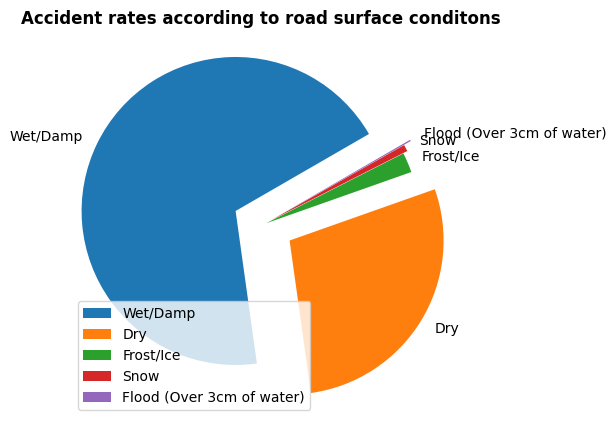

In [120]:
fig = plt.figure(figsize =(10, 5))
plt.pie(num_Surface, labels = Surface, colors = sns.color_palette(),startangle = 30,explode=(0.2,0.2,0.02,0.05,0.1))
plt.legend()
plt.title("Accident rates according to road surface conditons ",weight="bold")

In [162]:
StringList = ["Road_Type", "Light_Conditions", " Weather_Conditions", " Road_Surface_Conditions"]
integerList = ["Accident_Severity", "Number_of_Vehicles", "Number_of_Casualties", "Speed_limit", "Urban_or_Rural_Area", "Year"]

In [163]:
united2 = pd.get_dummies(united, StringList)
united2.head()

,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Speed_limit,Urban_or_Rural_Area,Year,Road_Type_Dual carriageway,Road_Type_One way street,Road_Type_Roundabout,Road_Type_Single carriageway,...,Weather_Conditions_Raining with high winds,Weather_Conditions_Raining without high winds,Weather_Conditions_Snowing with high winds,Weather_Conditions_Snowing without high winds,Weather_Conditions_Unknown,Road_Surface_Conditions_Dry,Road_Surface_Conditions_Flood (Over 3cm of water),Road_Surface_Conditions_Frost/Ice,Road_Surface_Conditions_Snow,Road_Surface_Conditions_Wet/Damp
0,2,1,1,30,1,2005,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
1,3,1,1,30,1,2005,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,3,2,1,30,1,2005,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,3,1,1,30,1,2005,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,3,1,1,30,1,2005,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [164]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [201]:
X = united2.drop(["Number_of_Vehicles"], axis =1)
y = united2["Number_of_Vehicles"]

In [202]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [203]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [204]:
y_pred = model.predict(X_test)

In [205]:
y_pred

array([1.8768692 , 1.77416992, 2.08824921, ..., 1.86782074, 1.93338776,
       1.70943451])

In [206]:
y_test

54966     2
441342    2
556483    1
292507    1
3880      2
         ..
445595    2
206418    2
175802    2
346903    2
99838     6
Name: Number_of_Vehicles, Length: 300414, dtype: int64

In [207]:
modeldf = united2.copy()
modeldf = pd.DataFrame({'Actual':y_test,'Prediction':y_pred})
modeldf

,Actual,Prediction
54966,2,1.876869
441342,2,1.774170
556483,1,2.088249
292507,1,2.236908
3880,2,1.593826
...,...,...
445595,2,1.781006
206418,2,1.409714
175802,2,1.867821
346903,2,1.933388


In [210]:
mean_sq_err = metrics.mean_squared_error(y_test, y_pred)

In [211]:
RMSE = np.sqrt(mean_sq_err)

In [212]:
RMSE 

0.6797565324177995